In [102]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

#### Reading the dataset

In [103]:
df = pd.read_csv("data.csv")
df.set_index('ID',inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [104]:
#Checking the presence of negative values in dataset
(df<0).apply(pd.value_counts)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000.0,4948,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
True,NaN,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Having 'Experience'<0 isn't possible in real world and thus might be due to error on data entry part

*Therefore we will remove such enteries before proceeding with our code*

In [105]:
df = df[df['Experience']>0]

In [106]:
#Again Checking the presence of negative values in dataset
(df<0).apply(pd.value_counts)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,4882,4882,4882,4882,4882,4882,4882,4882,4882,4882,4882,4882,4882


#### General description of columns

In [107]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000
mean,45.826506,20.605899,73.870750,93150.227366,2.386112,1.935412,1.874846,56.844326,0.096887,0.104056,0.061450,0.598730,0.294961
std,11.155088,11.136704,46.112752,2130.612121,1.148222,1.745065,0.839329,102.009136,0.295833,0.305364,0.240179,0.490206,0.456072
min,25.000000,1.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,11.000000,39.000000,91910.250000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,21.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.750000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Getting a better understanding of each attribute

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4882 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4882 non-null   int64  
 1   Experience          4882 non-null   int64  
 2   Income              4882 non-null   int64  
 3   ZIP Code            4882 non-null   int64  
 4   Family              4882 non-null   int64  
 5   CCAvg               4882 non-null   float64
 6   Education           4882 non-null   int64  
 7   Mortgage            4882 non-null   int64  
 8   Personal Loan       4882 non-null   int64  
 9   Securities Account  4882 non-null   int64  
 10  CD Account          4882 non-null   int64  
 11  Online              4882 non-null   int64  
 12  CreditCard          4882 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 534.0 KB


### Univariate analysis of all attributes

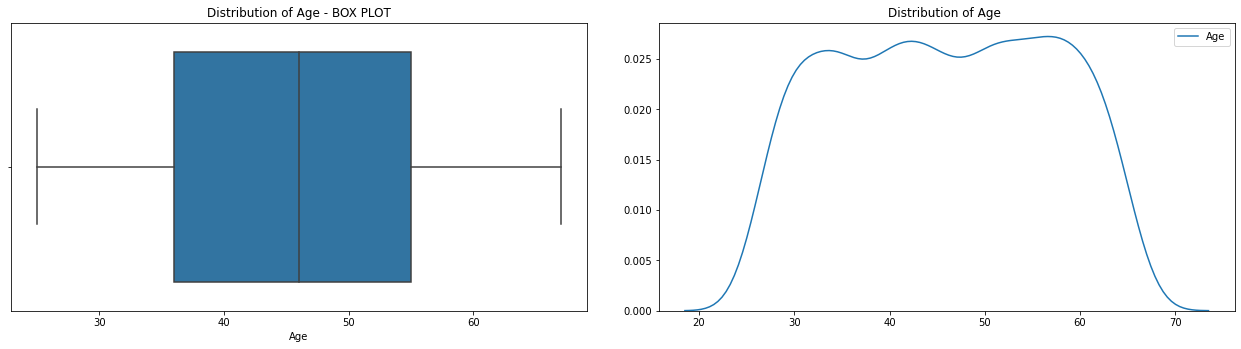

In [109]:
fig = plt.figure(figsize=(10,4))
axes1 = fig.add_axes([0,0,0.8,1])
plt.title("Distribution of Age - BOX PLOT")
sns.boxplot(df['Age'])
axes1 = fig.add_axes([0.9,0,0.8,1])
plt.title("Distribution of Age ")
sns.kdeplot(df['Age'])

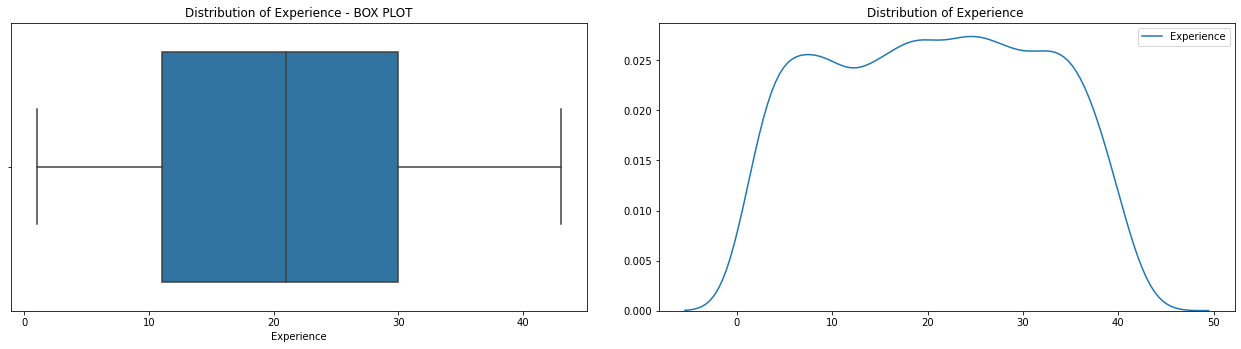

In [110]:
fig = plt.figure(figsize=(10,4))
axes1 = fig.add_axes([0,0,0.8,1])
plt.title("Distribution of Experience - BOX PLOT")
sns.boxplot(df['Experience'])
axes1 = fig.add_axes([0.9,0,0.8,1])
plt.title("Distribution of Experience ")
sns.kdeplot(df['Experience'])

- 'Age' & 'Experience' columns seem to be uniformly distributed

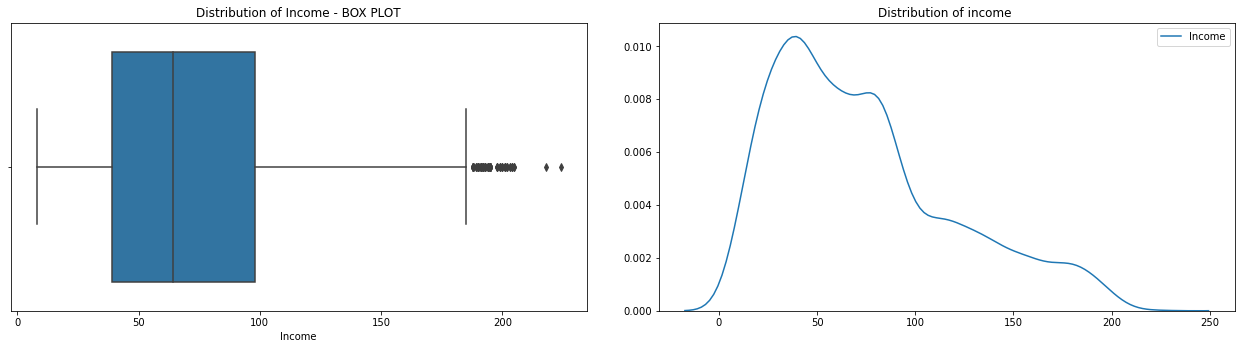

In [111]:
fig = plt.figure(figsize=(10,4))
axes1 = fig.add_axes([0,0,0.8,1])
plt.title("Distribution of Income - BOX PLOT")
sns.boxplot(df['Income'])
axes1 = fig.add_axes([0.9,0,0.8,1])
plt.title("Distribution of income ")
sns.kdeplot(df['Income'])

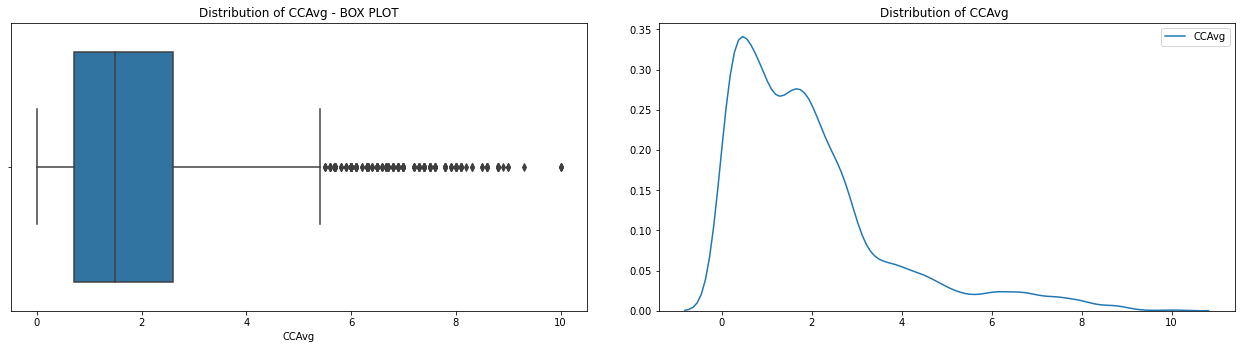

In [112]:
fig = plt.figure(figsize=(10,4))
axes1 = fig.add_axes([0,0,0.8,1])
plt.title("Distribution of CCAvg - BOX PLOT")
sns.boxplot(df['CCAvg'])
axes1 = fig.add_axes([0.9,0,0.8,1])
plt.title("Distribution of CCAvg ")
sns.kdeplot(df['CCAvg'])

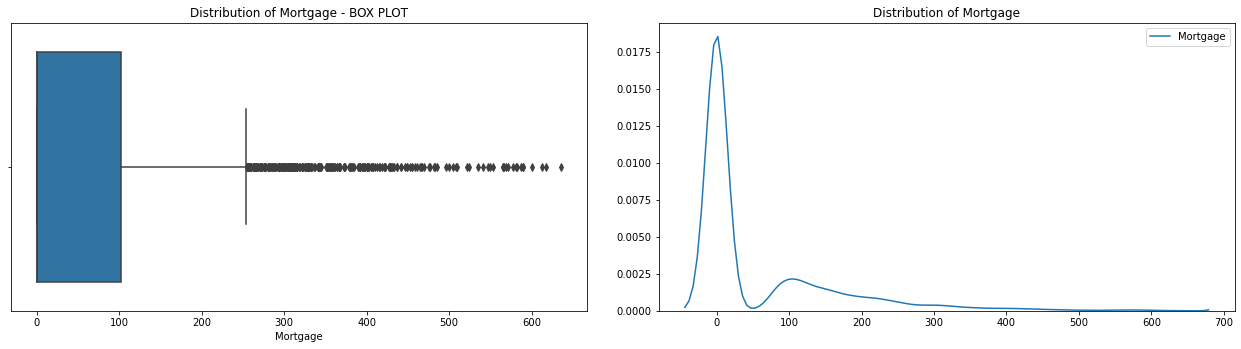

In [113]:
fig = plt.figure(figsize=(10,4))
axes1 = fig.add_axes([0,0,0.8,1])
plt.title("Distribution of Mortgage - BOX PLOT")
sns.boxplot(df['Mortgage'])
axes1 = fig.add_axes([0.9,0,0.8,1])
plt.title("Distribution of Mortgage")
sns.kdeplot(df['Mortgage'])

- 'Income' and 'CCAvg' columns appear to be slightly skewed 
- 'Mortgage' is highly skewed to the left

In [114]:
# Measure of skewness 
df.skew(axis = 0, skipna = True)[['Income','CCAvg','Mortgage']]

Income      0.840890
CCAvg       1.592008
Mortgage    2.102545
dtype: float64

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

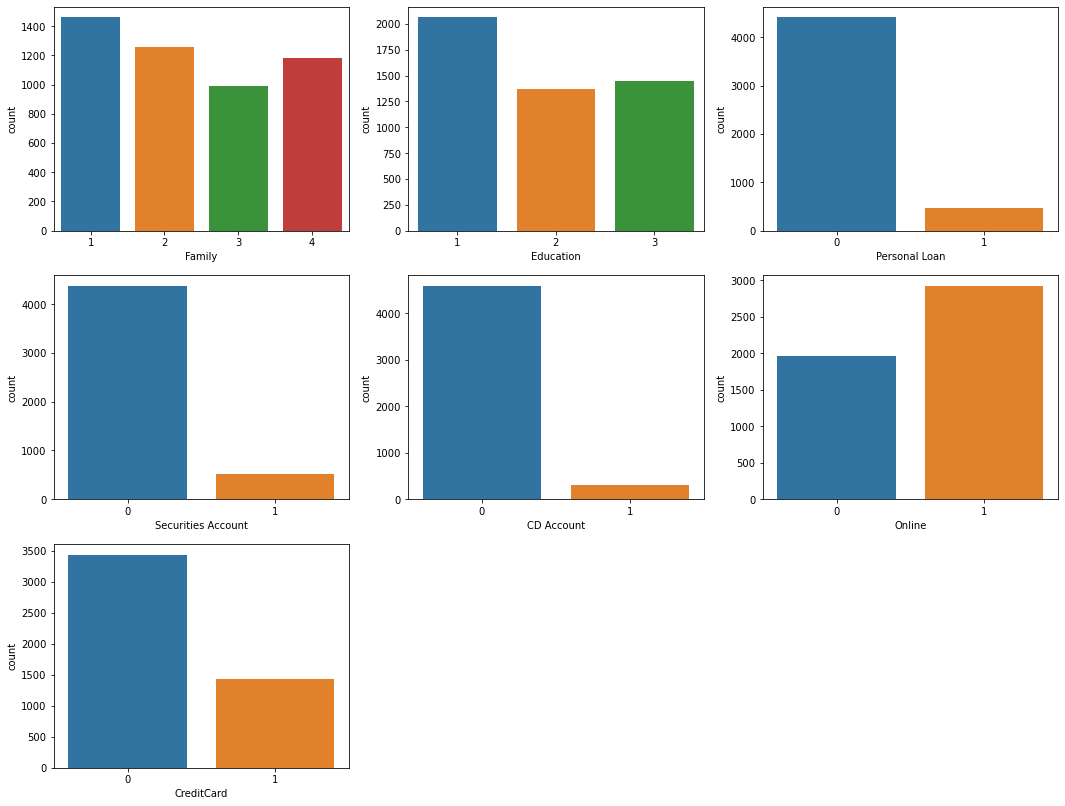

In [115]:
plt.figure(figsize=(18,14))

plt.subplot(3,3,1)
sns.countplot(df['Family'])

plt.subplot(3,3,2)
sns.countplot(df['Education'])

plt.subplot(3,3,3)
sns.countplot(df['Personal Loan'])

plt.subplot(3,3,4)
sns.countplot(df['Securities Account'])

plt.subplot(3,3,5)
sns.countplot(df['CD Account'])

plt.subplot(3,3,6)
sns.countplot(df['Online'])

plt.subplot(3,3,7)
sns.countplot(df['CreditCard'])

### Correlation analysis among all the variables

### Pairplot analysis

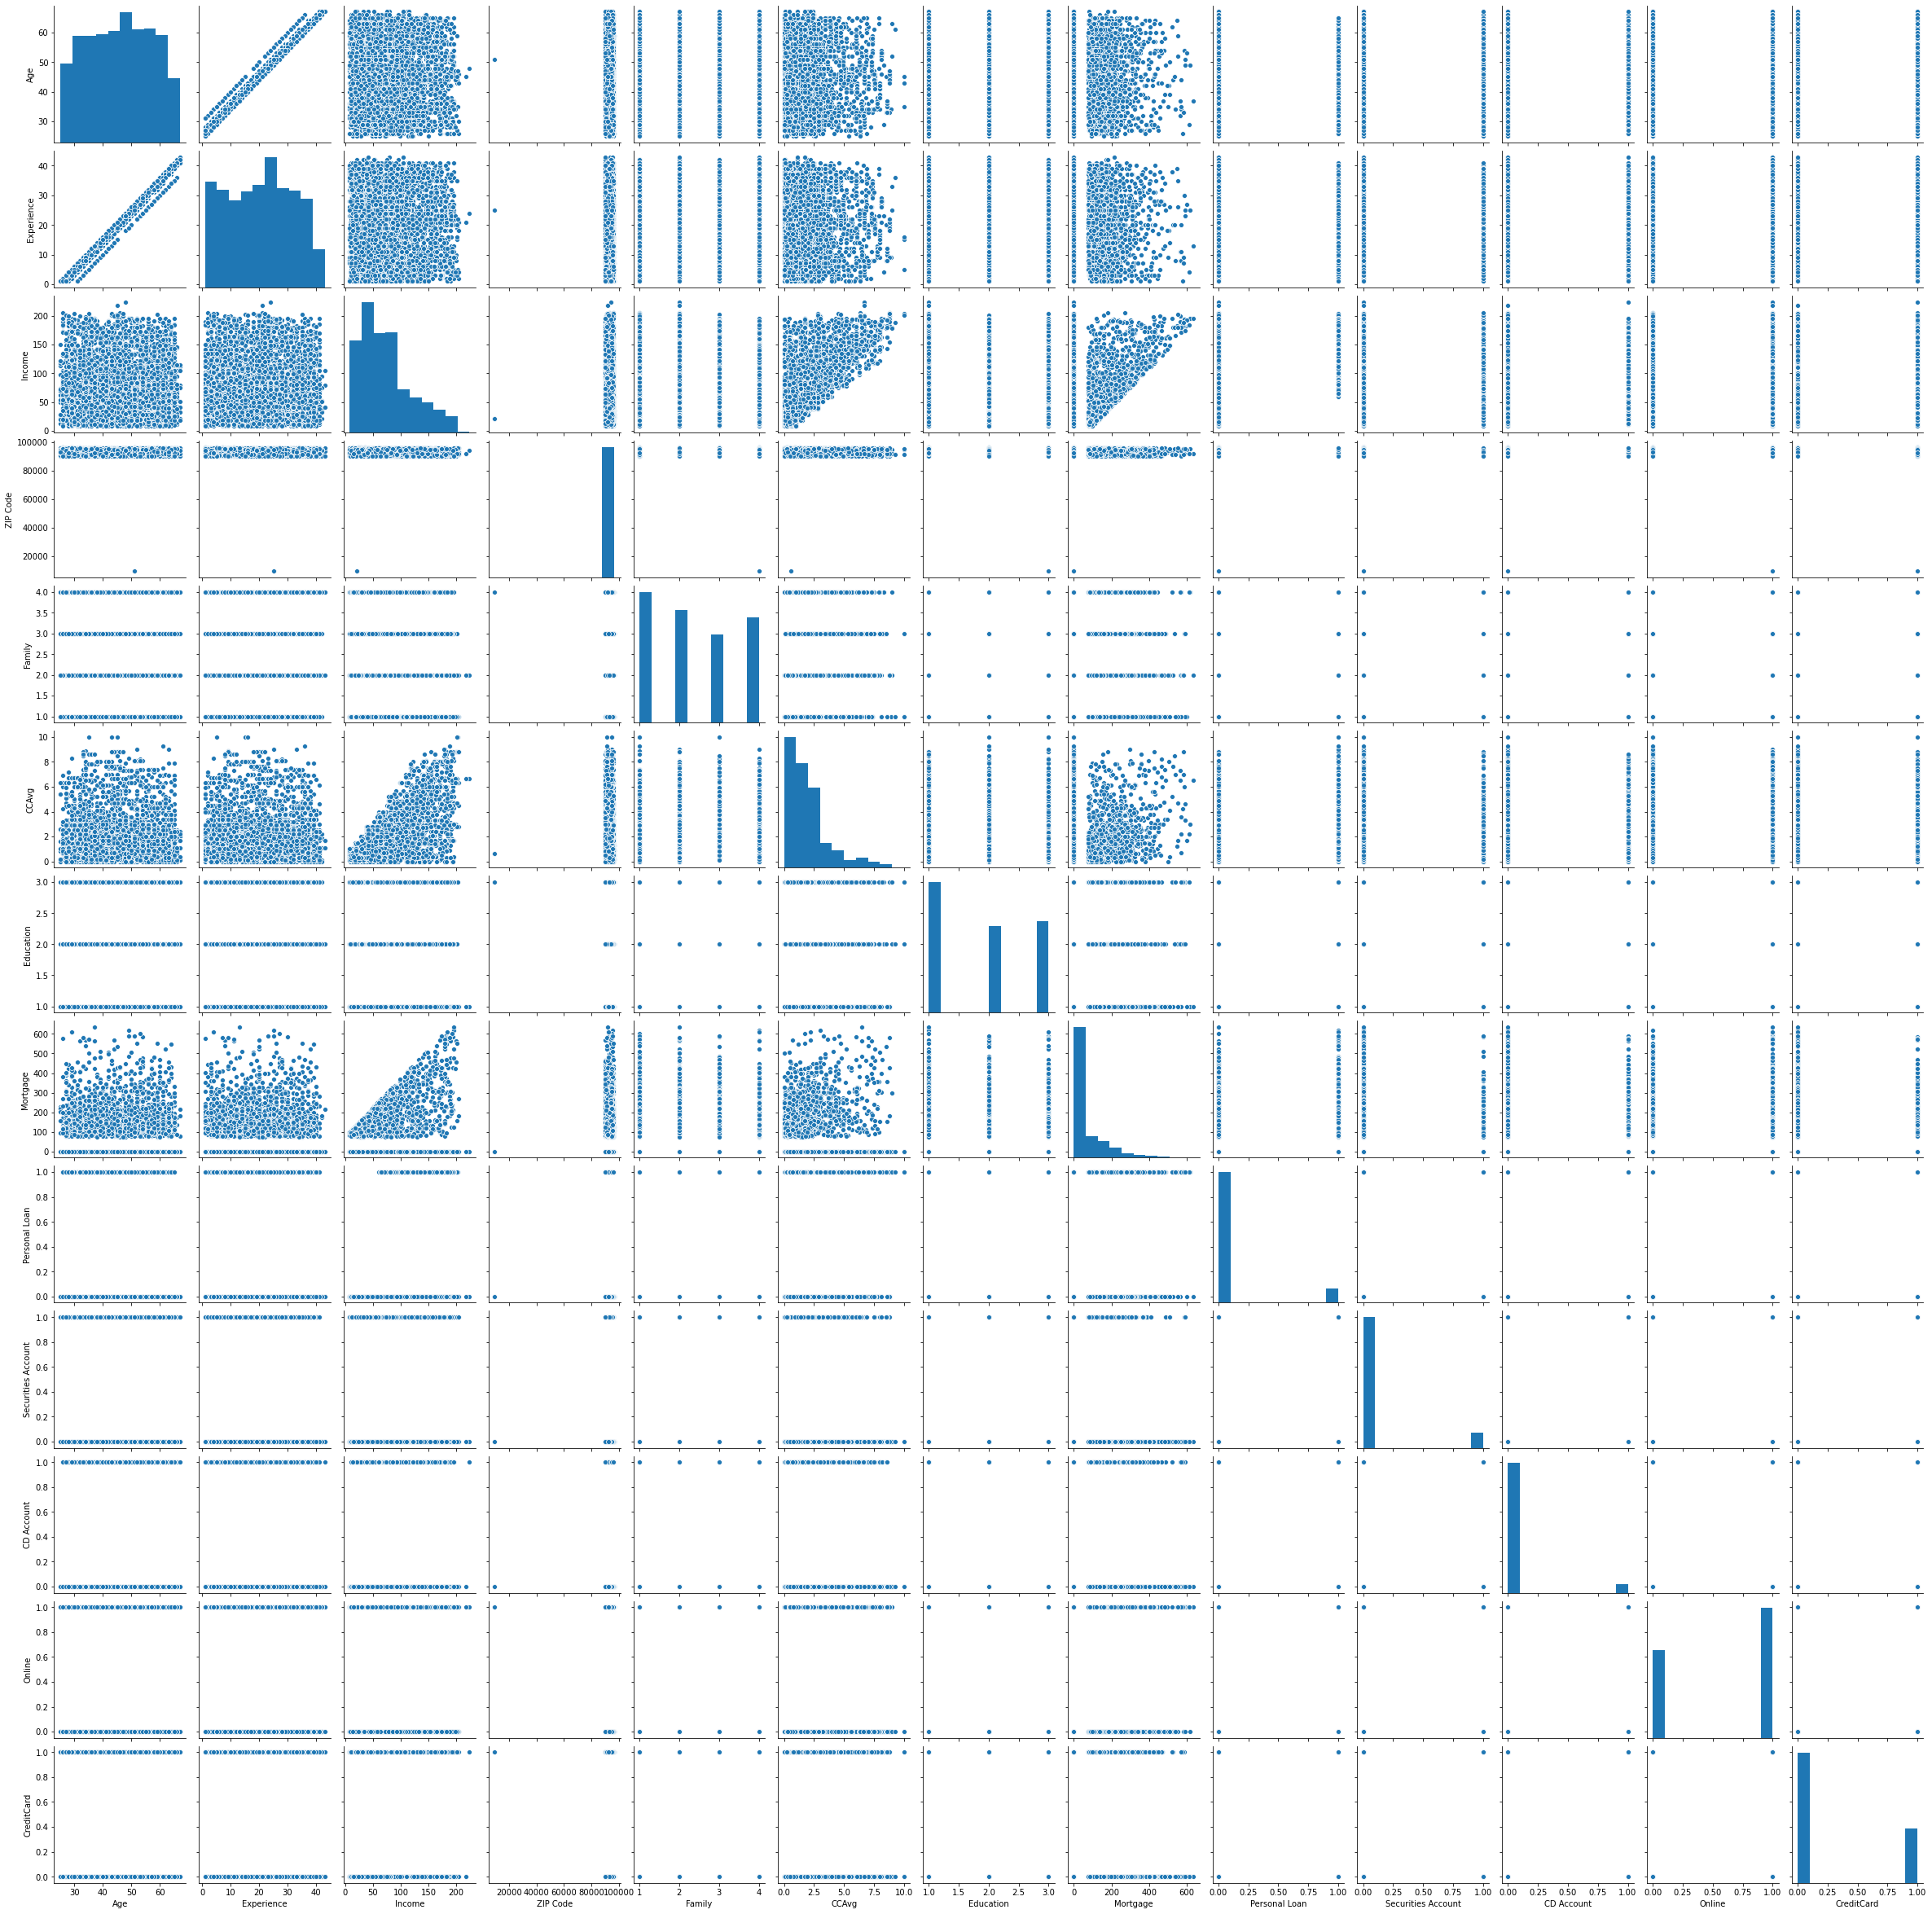

In [116]:
sns.pairplot(data=df)

### Correlation coefficients analysis

In [117]:
corr = df.corr()
corr

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993918,-0.061900,-0.029059,-0.032182,-0.052185,0.055843,-0.019232,-0.014213,0.001993,0.000233,0.007685,0.004020
Experience,0.993918,1.000000,-0.052955,-0.028182,-0.038326,-0.049912,0.027819,-0.017640,-0.013780,0.000916,0.002392,0.007429,0.005466
Income,-0.061900,-0.052955,1.000000,-0.015726,-0.155857,0.644857,-0.187229,0.207843,0.503433,-0.002420,0.169941,0.015950,-0.003331
ZIP Code,-0.029059,-0.028182,-0.015726,1.000000,0.012246,-0.003459,-0.019735,0.007279,0.001087,0.003456,0.020443,0.018178,0.008281
Family,-0.032182,-0.038326,-0.155857,0.012246,1.000000,-0.106727,0.061632,-0.017856,0.062346,0.016860,0.016467,0.010335,0.014084
CCAvg,-0.052185,-0.049912,0.644857,-0.003459,-0.106727,1.000000,-0.134311,0.110953,0.368715,0.013799,0.137307,-0.001032,-0.007898
Education,0.055843,0.027819,-0.187229,-0.019735,0.061632,-0.134311,1.000000,-0.030555,0.137956,-0.008331,0.013767,-0.014030,-0.013797
Mortgage,-0.019232,-0.017640,0.207843,0.007279,-0.017856,0.110953,-0.030555,1.000000,0.144046,-0.001999,0.090551,-0.007575,-0.006957
Personal Loan,-0.014213,-0.013780,0.503433,0.001087,0.062346,0.368715,0.137956,0.144046,1.000000,0.022184,0.316987,0.006782,0.003771
Securities Account,0.001993,0.000916,-0.002420,0.003456,0.016860,0.013799,-0.008331,-0.001999,0.022184,1.000000,0.317846,0.016212,-0.015947


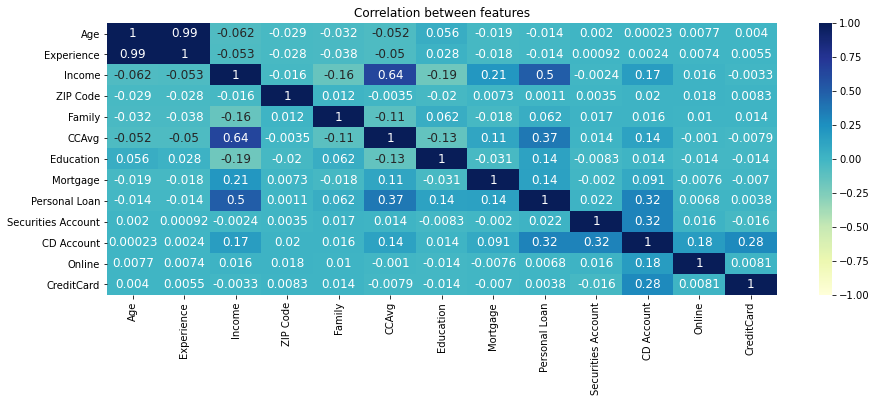

In [118]:
# To get a correlation matrix 
# Ploting correlation plot
plt.figure(figsize=(15, 5))

# plotting the heat map
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 12})

# specify name of the plot
plt.title('Correlation between features')
plt.show()

- 'Experience' and 'Age' are highly correlated which also makes sense
- 'Income' and 'CCAvg' is also correlated
- 'Income' and 'Personal Loan' is correlated

____
## Model preperation:-

### One hot encoding the Education variable

In [119]:
df_ed = df['Education']
dummy_encoded_variables = pd.get_dummies(df_ed, prefix='Education')
dummy_encoded_variables

,Education_1,Education_2,Education_3
ID,,,
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
5,0,1,0
...,...,...,...
4996,0,0,1
4997,1,0,0
4998,0,0,1


### Separating the data into dependent and independent variables and creating training and test sets out of them (X_train, y_train, X_test, y_test) 

In [120]:
from sklearn.model_selection import train_test_split
X = df[['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']]
y = df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify = y)

In [121]:
from collections import Counter
print("Training dist: ",Counter(y_train))
print("Testing dist:  ",Counter(y_test))

Training dist:  Counter({0: 2953, 1: 317})
Testing dist:   Counter({0: 1456, 1: 156})


- Here we have used STRATIFIED split as our decision variable isn't balanced

#### Using StandardScaler() to scale the values

In [122]:
from sklearn.preprocessing import StandardScaler

#Creating Scaler object
scaler = StandardScaler()

#Fitting the object with train data
scaler.fit(X_train)

StandardScaler()

In [123]:
#Transforming the data using scaler object
scaled_Train = scaler.transform(X_train)
scaled_Test = scaler.transform(X_test)

### Creating a function which takes a model, X_train, X_test, y_train and y_test as input and returns the accuracy, recall, precision, specificity, f1_score of the model trained on the train set and evaluated on the test set

In [124]:
#Evaluating the model
def Evaluate_Model(model,X_train,X_test,y_train,y_test):
    
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    
    specificity = tn / (tn+fp)
    
    return accuracy,recall,precision,specificity,f1

### Finding out the best 'n' value to be used in KNN:-

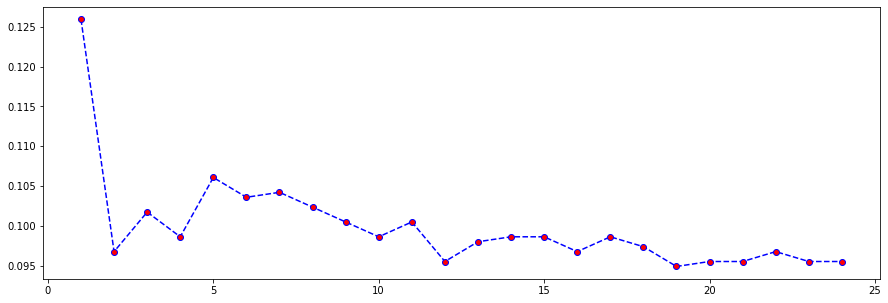

In [134]:
error_rate=[]
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(15,5))
plt.plot(range(1,25),error_rate,color="blue",ls='--',marker='o',markerfacecolor='red')

#### n_neighbors value = 7 suits our model

### Employing multiple Classification models (Logistic, K-NN, Naïve Bayes etc) and using the function to train and get the metrics of the model

### Case 1: Logistic Regression Model

In [136]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
#Training the model and getting metrics in return
log_score = Evaluate_Model(log_model,scaled_Train,scaled_Test,y_train,y_test)

### Case 2: KNN Model

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
#Training the model and getting metrics in return
knn_score = Evaluate_Model(knn,scaled_Train,scaled_Test,y_train,y_test)

### Case 3: Naïve Bayes Model

In [138]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
#Training the model and getting metrics in return
GNB_score = Evaluate_Model(GNB,scaled_Train,scaled_Test,y_train,y_test)

### Creating a dataframe with the columns - “Model”, “accuracy”, “recall”, “precision”, “specificity”, “f1_score”.

In [139]:
model_names = ['Logistic Model','KNN','Naïve Bayes']

#Creating arrays to store results
accuracy = np.zeros(3)
recall = np.zeros(3)
precision = np.zeros(3)
specificity = np.zeros(3)
f1= np.zeros(3)

#Tuple Unpacking
accuracy[0] ,recall[0], precision[0], specificity[0], f1[0] = log_score
accuracy[1] ,recall[1], precision[1], specificity[1], f1[1] = knn_score
accuracy[2] ,recall[2], precision[2], specificity[2], f1[2] = GNB_score

In [140]:
#Creating a dataframe
comp_df = pd.DataFrame({'Model':model_names,'Accuracy':accuracy,'Recall':recall,'Precision':precision,'Specificity':specificity,'F1-score':f1})
comp_df.set_index('Model', inplace = True)

In [141]:
comp_df

,Accuracy,Recall,Precision,Specificity,F1-score
Model,,,,,
Logistic Model,0.957816,0.679487,0.854839,0.987637,0.757143
KNN,0.955335,0.570513,0.946809,0.996566,0.712000
Naïve Bayes,0.887097,0.621795,0.440909,0.915522,0.515957


## Comparing Model Performance

### The best model for this case is "K-Nearest-Neihgbours" model as its Precision (94.7%), Accuracy (95.5%), and Specificity (0.99) is quite great and other parameters are comparable with other models too.

#### Note: Here '7' nearest neighbours are considered for building our model, this value can be altered accordingly as per our needs which might result in a different score

#### The second best model for this case is "Logistic Reression Model" which has an accuracy of 95.8% and precesion of 85.5%
_______